In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Setup

In [2]:
# Reads the COVID-19 data from the New York Times by county in the U.S.
data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943233 entries, 0 to 943232
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    943233 non-null  object 
 1   county  943233 non-null  object 
 2   state   943233 non-null  object 
 3   fips    934434 non-null  float64
 4   cases   943233 non-null  int64  
 5   deaths  923068 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 43.2+ MB


In [4]:
data.describe()

,fips,cases,deaths
count,934434.000000,9.432330e+05,923068.000000
mean,31273.607788,2.256154e+03,57.562226
std,16301.113750,1.185291e+04,462.654322
min,1001.000000,0.000000e+00,0.000000
25%,19001.000000,4.100000e+01,0.000000
50%,29217.000000,2.690000e+02,5.000000
75%,46101.000000,1.161000e+03,25.000000
max,78030.000000,1.024592e+06,26104.000000


In [5]:
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [6]:
data.tail()

,date,county,state,fips,cases,deaths
943228,2021-01-18,Sweetwater,Wyoming,56037.0,3312,26.0
943229,2021-01-18,Teton,Wyoming,56039.0,2753,4.0
943230,2021-01-18,Uinta,Wyoming,56041.0,1833,9.0
943231,2021-01-18,Washakie,Wyoming,56043.0,843,23.0
943232,2021-01-18,Weston,Wyoming,56045.0,602,4.0


# Exploratory Data Analysis

## Converting ```date``` Column from ```string``` to ```datetime```

In [7]:
# Checking the data type of elements in the date column

type(data['date'].iloc[0])

str

In [8]:
# Converting the elements in the date column from str to datetime

data['date'] = pd.to_datetime(data['date'])

In [9]:
# Creating 5 new columns based on month, month of year, day, day of month, and year

time = data['date'].iloc[0]

data['month'] = data['date'].apply(lambda time: time.month_name())
data['month of year'] = data['date'].apply(lambda time: time.month)
data['day'] = data['date'].apply(lambda time: time.day_name())
data['day of month'] = data['date'].apply(lambda time: time.day)
data['year'] = data['date'].apply(lambda time: time.year)

In [10]:
data.head()

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,January,1,Tuesday,21,2020
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,January,1,Wednesday,22,2020
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,January,1,Thursday,23,2020
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,January,1,Friday,24,2020
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,January,1,Friday,24,2020


## Checking for Null Values

In [11]:
data.isnull().sum()

date                 0
county               0
state                0
fips              8799
cases                0
deaths           20165
month                0
month of year        0
day                  0
day of month         0
year                 0
dtype: int64

This tells us that there are 8772 entries where the FIPS is null and 20,087 entries where the number of deaths isn't recorded

In [12]:
# Gets the total number of rows with missing values for a given column.
total = data.isnull().sum().sort_values(ascending=False)

# Gets the percentage of missing data in a column.
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

# Concatenates the total and percentage DataFrame objects to create a new table.
# The total and percentage values are set to the columns with 1 being passed in
# for the axis parameter. The keys in the table are then set to the strings
# 'total' and 'percentage'.
missing_data = pd.concat([total, percentage], axis=1, keys=['total', 'percentage'])

missing_data

,total,percentage
deaths,20165,0.021379
fips,8799,0.009329
year,0,0.000000
day of month,0,0.000000
day,0,0.000000
month of year,0,0.000000
month,0,0.000000
cases,0,0.000000
state,0,0.000000
county,0,0.000000


In [13]:
data[data['deaths'].isnull()]

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
117486,2020-05-05,Adjuntas,Puerto Rico,72001.0,3,NaN,May,5,Tuesday,5,2020
117487,2020-05-05,Aguada,Puerto Rico,72003.0,7,NaN,May,5,Tuesday,5,2020
117488,2020-05-05,Aguadilla,Puerto Rico,72005.0,11,NaN,May,5,Tuesday,5,2020
117489,2020-05-05,Aguas Buenas,Puerto Rico,72007.0,22,NaN,May,5,Tuesday,5,2020
117490,2020-05-05,Aibonito,Puerto Rico,72009.0,13,NaN,May,5,Tuesday,5,2020
...,...,...,...,...,...,...,...,...,...,...,...
942390,2021-01-18,Vega Baja,Puerto Rico,72145.0,2465,NaN,January,1,Monday,18,2021
942391,2021-01-18,Vieques,Puerto Rico,72147.0,193,NaN,January,1,Monday,18,2021
942392,2021-01-18,Villalba,Puerto Rico,72149.0,665,NaN,January,1,Monday,18,2021
942393,2021-01-18,Yabucoa,Puerto Rico,72151.0,899,NaN,January,1,Monday,18,2021


In [14]:
data[data['fips'].isnull()]

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
416,2020-03-01,New York City,New York,NaN,1,0.0,March,3,Sunday,1,2020
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0,March,3,Sunday,1,2020
448,2020-03-02,New York City,New York,NaN,1,0.0,March,3,Monday,2,2020
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0,March,3,Monday,2,2020
482,2020-03-03,New York City,New York,NaN,2,0.0,March,3,Tuesday,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
942387,2021-01-18,Unknown,Puerto Rico,NaN,4143,1703.0,January,1,Monday,18,2021
942399,2021-01-18,Unknown,Rhode Island,NaN,12765,84.0,January,1,Monday,18,2021
942600,2021-01-18,Unknown,Tennessee,NaN,12961,107.0,January,1,Monday,18,2021
942887,2021-01-18,Unknown,Utah,NaN,1487,8.0,January,1,Monday,18,2021


According to the README on the NYTimes covid-19-data repository, FIPS codes for areas like New York City (which is split into boroughs) is left empty. These may be added in the future.

In [15]:
data[data['county'] == 'Unknown']

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0,March,3,Sunday,1,2020
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0,March,3,Monday,2,2020
485,2020-03-03,Unknown,Rhode Island,NaN,2,0.0,March,3,Tuesday,3,2020
522,2020-03-04,Unknown,Rhode Island,NaN,2,0.0,March,3,Wednesday,4,2020
569,2020-03-05,Unknown,Rhode Island,NaN,2,0.0,March,3,Thursday,5,2020
...,...,...,...,...,...,...,...,...,...,...,...
942387,2021-01-18,Unknown,Puerto Rico,NaN,4143,1703.0,January,1,Monday,18,2021
942399,2021-01-18,Unknown,Rhode Island,NaN,12765,84.0,January,1,Monday,18,2021
942600,2021-01-18,Unknown,Tennessee,NaN,12961,107.0,January,1,Monday,18,2021
942887,2021-01-18,Unknown,Utah,NaN,1487,8.0,January,1,Monday,18,2021


### Graph 2.1 - Heatmap of Missing Values

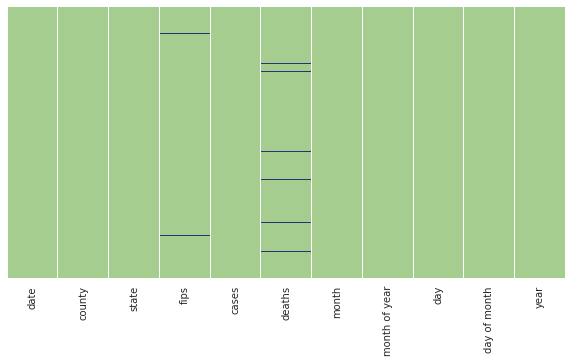

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='crest')

Our analysis from earlier showed that ~2.1% of the rows had a null value for ```deaths``` while ~0.93% of the rows had a null value for ```fips```. This corresponds to the heat map of the missing values for each column shown above. These percentages are negligible enough so that the null values can be ignored without heavily affecting our analysis on the data.

# Analysis of Covid-19 in the United States

### Testing with Consolidating State Data by Date

Using California as an example.

In [17]:
cali_data = data[data['state'] == 'California'].reset_index(drop=True)
cali_data = cali_data.drop(labels=['county', 'state', 'fips', 'month', 'month of year', 'day',
                       'day of month', 'year'], axis=1)
cali_data

,date,cases,deaths
0,2020-01-25,1,0.0
1,2020-01-26,1,0.0
2,2020-01-26,1,0.0
3,2020-01-27,1,0.0
4,2020-01-27,1,0.0
...,...,...,...
17840,2021-01-18,41016,501.0
17841,2021-01-18,3359,39.0
17842,2021-01-18,61257,412.0
17843,2021-01-18,10519,131.0


In [18]:
cali_data.groupby('date').sum().reset_index()

,date,cases,deaths
0,2020-01-25,1,0.0
1,2020-01-26,2,0.0
2,2020-01-27,2,0.0
3,2020-01-28,2,0.0
4,2020-01-29,2,0.0
...,...,...,...
355,2021-01-14,2898271,32246.0
356,2021-01-15,2937376,32947.0
357,2021-01-16,2974966,33393.0
358,2021-01-17,3006583,33593.0


In [19]:
# Gets the Covid-19 data at the end of 2020. We previously established
# that the bot automatically updates each county with the new totals for
# each day.
data_2020 = data[(data['year'] == 2020) & (data['month'] == 'December') & (data['day of month'] == 31)].sort_values('cases', ascending=False)

In [20]:
data_2020

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
881776,2020-12-31,Los Angeles,California,6037.0,770915,10345.0,December,12,Thursday,31,2020
883445,2020-12-31,New York City,New York,NaN,430863,25144.0,December,12,Thursday,31,2020
882187,2020-12-31,Cook,Illinois,17031.0,393652,8285.0,December,12,Thursday,31,2020
881674,2020-12-31,Maricopa,Arizona,4013.0,322449,5125.0,December,12,Thursday,31,2020
881936,2020-12-31,Miami-Dade,Florida,12086.0,298872,4188.0,December,12,Thursday,31,2020
...,...,...,...,...,...,...,...,...,...,...,...
884343,2020-12-31,Loving,Texas,48301.0,1,0.0,December,12,Thursday,31,2020
882770,2020-12-31,Unknown,Maine,NaN,1,0.0,December,12,Thursday,31,2020
882125,2020-12-31,Kalawao,Hawaii,15005.0,1,0.0,December,12,Thursday,31,2020
882564,2020-12-31,Unknown,Kansas,NaN,0,402.0,December,12,Thursday,31,2020


From this, it's clear that the NYTimes Covid bot updates the new running count every day as 
opposed to the new cases and deaths each day.

## United States Covid-19 Cases and Deaths in 2020

### Graph 3.1 - Bar Plot of Covid-19 Cases and Deaths in 2020

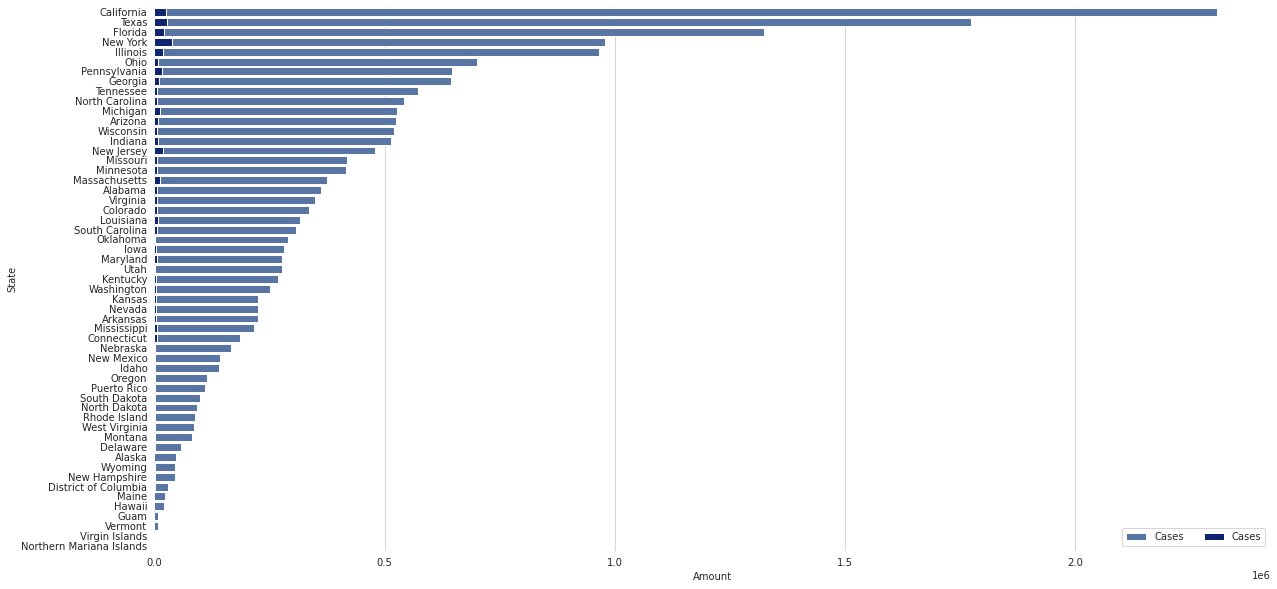

In [21]:
f, ax = plt.subplots(figsize=(20, 10))

# Consolidating the data per state into one row

# Drops the columns which won't be needed for the bar graph
state_data_2020 = data_2020.drop(labels=['date', 'county', 'fips', 'month', 'month of year',
                                         'day', 'day of month', 'year'], axis=1)

# Sorts the values of state_data_2020 by state and re-indexes them by state
state_data_2020 = state_data_2020.sort_values('state').reset_index(drop=True)

# Groups the new data by state, computes the sum of cases and deaths, then sorts the rows
# by cases
state_data_2020 = state_data_2020.groupby('state').sum().sort_values('cases', ascending=False)

# Plots the number of cases on the bar graph
sns.set_color_codes('deep')
sns.barplot(x='cases', y=state_data_2020.index, data=state_data_2020, label='Cases', color='b')

# Plots the number of deaths on the bar graph
sns.set_color_codes('dark')
sns.barplot(x='deaths', y=state_data_2020.index, data=state_data_2020, label='Cases', color='b')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="State", xlabel="Amount")
sns.despine(left=True, bottom=True)

As shown by Graph 3.1, New York, Texas, California, Florida, New Jersey, Illinois, Massachusetts, and Michigan stand out as states with the most deaths due to Covid-19 at the end of 2020. On the other hand, the following states are ranked by their number of Covid-19 cases according to the graph:
1. California
1. Texas
1. Florida
1. New York
1. Illinois
1. Ohio
1. Pennsylvania
1. Georgia
1. Tennessee
1. North Carolina

## Day to Day Death and Case Count in the U.S.

In [64]:
plt.figure(figsize=(10,5))

daily_data = data.drop(['county', 'state', 'fips', 'month', 'month of year', 'day',\
                       'day of month', 'year'], axis=1)

daily_data = daily_data.groupby('date').sum().reset_index()

daily_data['daily cases'] = daily_data.cases.diff()
daily_data['daily deaths'] = daily_data.deaths.diff()

<Figure size 720x360 with 0 Axes>

In [65]:
daily_data.head()

,date,cases,deaths,daily cases,daily deaths
0,2020-01-21,1,0.0,NaN,NaN
1,2020-01-22,1,0.0,0.0,0.0
2,2020-01-23,1,0.0,0.0,0.0
3,2020-01-24,2,0.0,1.0,0.0
4,2020-01-25,3,0.0,1.0,0.0


In [ ]:
# Fixing null values

daily_data.iloc[0]['daily cases'] == 1
daily_data.iloc[0]['daily cases'] == 0

In [66]:
daily_data.tail()

,date,cases,deaths,daily cases,daily deaths
359,2021-01-14,23371360,388792.0,238620.0,3980.0
360,2021-01-15,23612307,392541.0,240947.0,3749.0
361,2021-01-16,23813966,395882.0,201659.0,3341.0
362,2021-01-17,23983607,397612.0,169641.0,1730.0
363,2021-01-18,24126194,399053.0,142587.0,1441.0


### Graph 3.2 - Daily Covid-19 Cases in the U.S.

Text(0.5, 1.0, 'Daily Cases vs. Days Since First Report')

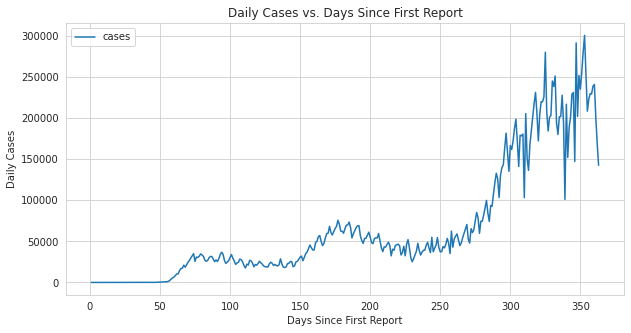

In [67]:
plt.figure(figsize=(10,5))
sns.lineplot(data=daily_data['daily cases'], label='cases')
plt.xlabel('Days Since First Report')
plt.ylabel('Daily Cases')
plt.title('Daily Cases vs. Days Since First Report')

Graph 3.2 shows that the number of Covid-19 cases in the U.S. saw sudden increases around 60 days, 150 days, and 275 days after the first report on Jan. 21, 2020. These align with spring break, summer vacation, and Halloween (and the holiday season as a whole) respectively.

### Graph 3.3 - Daily Covid-19 Deaths in the U.S.

Text(0.5, 1.0, 'Daily Deaths vs. Days Since First Report')

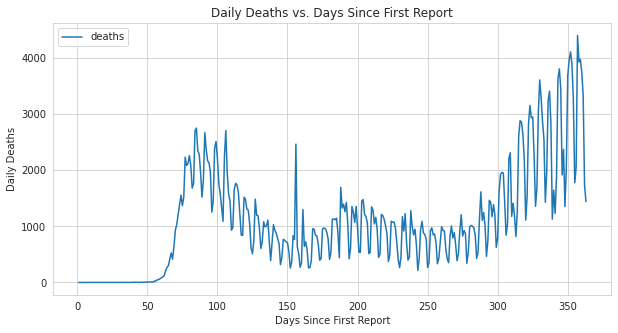

In [68]:
plt.figure(figsize=(10,5))
sns.lineplot(data=daily_data['daily deaths'], label='deaths')
plt.xlabel('Days Since First Report')
plt.ylabel('Daily Deaths')
plt.title('Daily Deaths vs. Days Since First Report')

Similar to Graph 3.2, Graph 3.3 shows surges in Covid-related deaths at around 60, 150, and 275 days after the first report.

## Current United States Covid-19 Data



In [23]:
# Shows that the date is currently a Timestamp object
type(data['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
# Shows that the datetime object has type
today = pd.to_datetime('now').date()
print(today.year, today.month, today.day)
print(type(data['year'].iloc[0]))
print(type(int(data['year'].iloc[0])))
print(type(today.year))

2021 1 19
<class 'numpy.int64'>
<class 'int'>
<class 'int'>


In [25]:
# Shows that the 'date' column in data is normalized to
# have its times set to midnight.
print(data.iloc[2]['date'])

# Normalizes a datetime object to set the time to midnight.
print(pd.Timestamp.now().normalize())

2020-01-23 00:00:00
2021-01-19 00:00:00


### Getting the Current Data

In [26]:
from datetime import datetime, timedelta, timezone

def get_current_data(df):
  '''
  precondition: data is a pandas DataFrame object
  postcondition: returns the rows with yesterday's date
  '''

  # Gets yesterday's date since the NYTimes Covid bot updates the previous day's reports
  # at roughly 1AM EST.
  # Subtracts 5 hours since datetime.now() returns the time in UTC.
  yesterday = datetime.now() - timedelta(days=1) - timedelta(hours=5)

  # Creates a new DataFrame as a subset of the data passed into the function where
  # the date is for the previous day.
  current_data = df[(df['year'] == yesterday.year) &
                 (df['month of year'] == yesterday.month) &
                 (df['day of month'] == yesterday.day)]

  return current_data

In [27]:
curr_data = get_current_data(data)

curr_data

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
939988,2021-01-18,Autauga,Alabama,1001.0,5198,55.0,January,1,Monday,18,2021
939989,2021-01-18,Baldwin,Alabama,1003.0,16346,182.0,January,1,Monday,18,2021
939990,2021-01-18,Barbour,Alabama,1005.0,1730,36.0,January,1,Monday,18,2021
939991,2021-01-18,Bibb,Alabama,1007.0,2162,47.0,January,1,Monday,18,2021
939992,2021-01-18,Blount,Alabama,1009.0,5308,83.0,January,1,Monday,18,2021
...,...,...,...,...,...,...,...,...,...,...,...
943228,2021-01-18,Sweetwater,Wyoming,56037.0,3312,26.0,January,1,Monday,18,2021
943229,2021-01-18,Teton,Wyoming,56039.0,2753,4.0,January,1,Monday,18,2021
943230,2021-01-18,Uinta,Wyoming,56041.0,1833,9.0,January,1,Monday,18,2021
943231,2021-01-18,Washakie,Wyoming,56043.0,843,23.0,January,1,Monday,18,2021


In [28]:
sorted_curr_data = curr_data.sort_values('cases', ascending=False)

sorted_curr_data

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
940192,2021-01-18,Los Angeles,California,6037.0,1024592,13936.0,January,1,Monday,18,2021
941861,2021-01-18,New York City,New York,NaN,536287,26104.0,January,1,Monday,18,2021
940603,2021-01-18,Cook,Illinois,17031.0,434341,9046.0,January,1,Monday,18,2021
940090,2021-01-18,Maricopa,Arizona,4013.0,421551,6443.0,January,1,Monday,18,2021
940352,2021-01-18,Miami-Dade,Florida,12086.0,346089,4617.0,January,1,Monday,18,2021
...,...,...,...,...,...,...,...,...,...,...,...
942759,2021-01-18,Loving,Texas,48301.0,1,0.0,January,1,Monday,18,2021
940541,2021-01-18,Kalawao,Hawaii,15005.0,1,0.0,January,1,Monday,18,2021
941211,2021-01-18,Unknown,Maryland,NaN,0,61.0,January,1,Monday,18,2021
940980,2021-01-18,Unknown,Kansas,NaN,0,706.0,January,1,Monday,18,2021


### Graph 3.4 - Scatter Plot of Current State vs. Cases and Death Count

Text(0.5, 1.0, 'State vs. Covid-19 Cases')

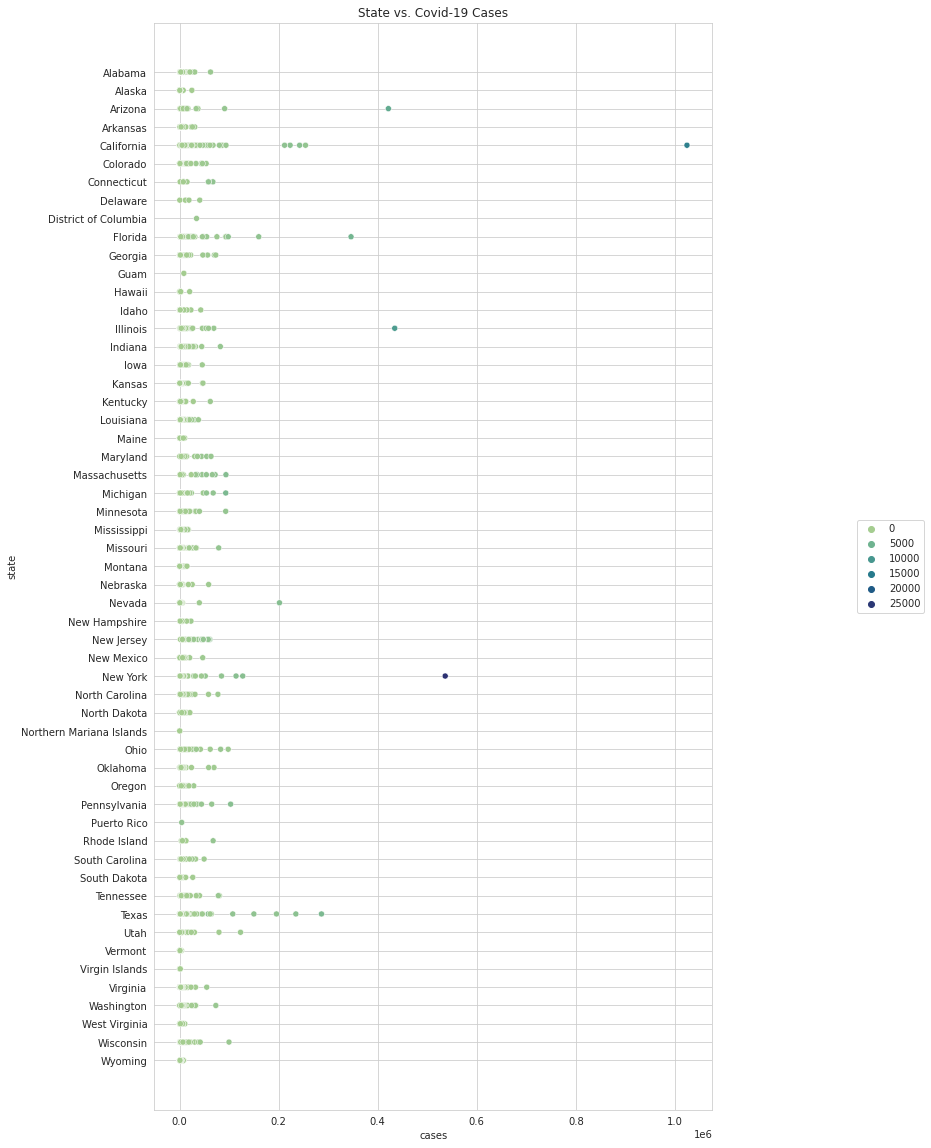

In [29]:
plt.figure(figsize=(10,20))
sns.scatterplot(x=curr_data['cases'], y=curr_data['state'], hue=curr_data['deaths'], data=curr_data, palette='crest')
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('State vs. Covid-19 Cases')

This scatter plot shows that California, New York, Arizona, Florida, Illinois, and Texas have the most cases and deaths among the 50 states and 5 territories displayed.

### Graph 3.5 - Plot of COVID-19 Cases per State/Territory Since First Report

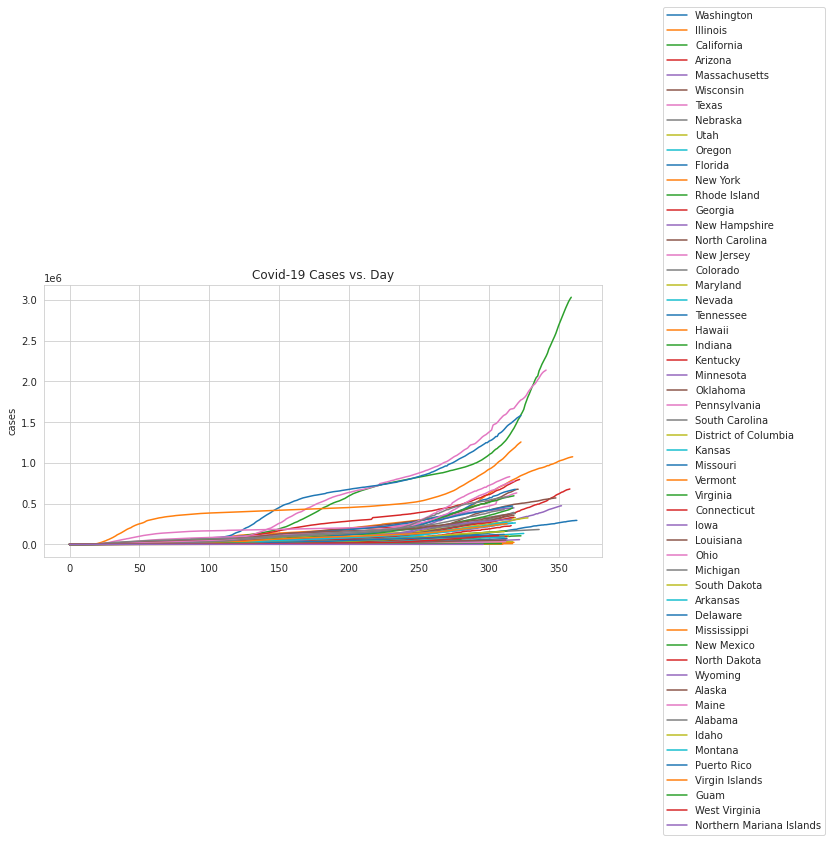

In [30]:
plt.figure(figsize=(10,5))

# Iterates over the unique states (or territories) listed in the original data
for state in data.state.unique():
  # Creates a subset of the original data where the state is the same as the
  # current state from the for loop
  state_data = data[data['state'] == state].reset_index()

  # Drops the labels which won't be needed for the graph
  state_data = state_data.drop(labels=['county', 'state', 'fips', 'month', 'month of year', 'day',
                                       'day of month', 'year'], axis=1)
  
  # Groups the state's data by date, sums the cases and deaths, then resets
  # the row indices
  state_data = state_data.groupby('date').sum().reset_index()

  # Plots the curve for Covid-19 cases for the current state
  sns.lineplot(data=state_data['cases'], label=state)

plt.title('Covid-19 Cases vs. Day')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)

There are 50 states and 5 territories plotted on this graph. As a result, it is difficult to tell which line corresponds to which state or territory. However, we can surmise - using the deductions from Graph 3.4 - that the green line reaching around 3e6 cases is California. More detailed analysis between states will be run in Section 5.

### Graph 3.6 - Plot of Covid-19 Deaths per State/Territory Since First Report

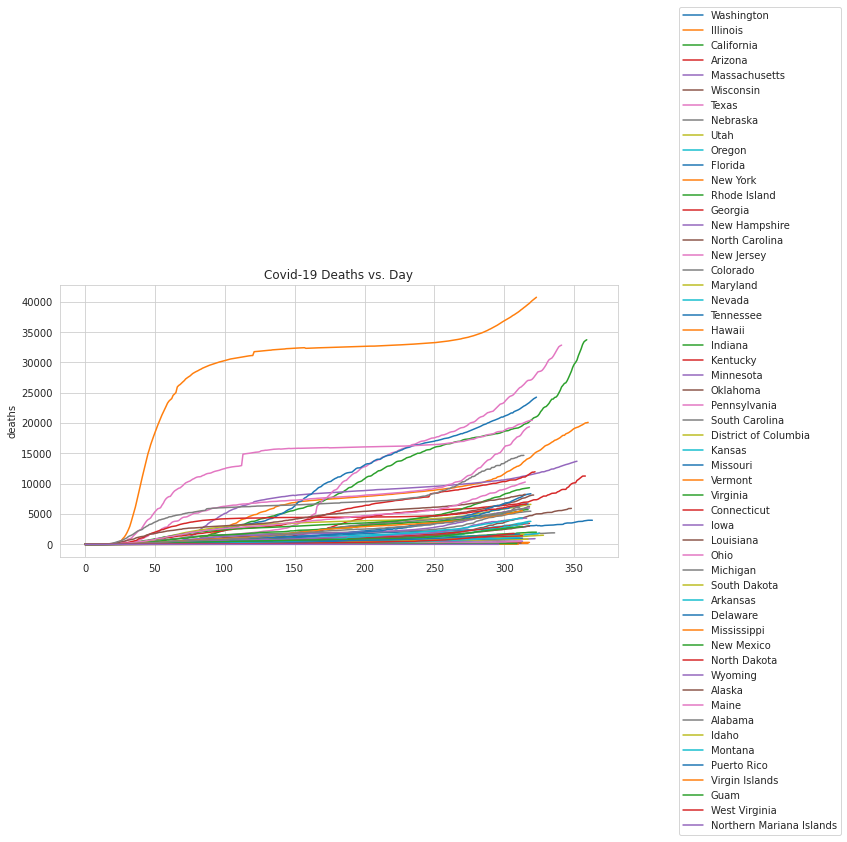

In [31]:
plt.figure(figsize=(10,5))

# Iterates over the unique states (or territories) listed in the original data
for state in data.state.unique():
  # Creates a subset of the original data where the state is the same as the
  # current state from the for loop
  state_data = data[data['state'] == state].reset_index()

  # Drops the labels which won't be needed for the graph
  state_data = state_data.drop(labels=['county', 'state', 'fips', 'month', 'month of year', 'day',
                                       'day of month', 'year'], axis=1)
  
  # Groups the state's data by date, sums the cases and deaths, then resets
  # the row indices
  state_data = state_data.groupby('date').sum().reset_index()

  # Plots the curve for Covid-19 deaths for the current state
  sns.lineplot(data=state_data['deaths'], label=state)

plt.title('Covid-19 Deaths vs. Day')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)

Similar to Graph 3.5, we can use Graph 3.4 to deduce the following:
- The orange curve setting the highest number of deaths belongs to New York
- California is the green curve at around 34,000 deaths
- Texas is likely the pink curve at around 32,500 deaths

### Graph 3.7 - Bar Plot of Current Covid-19 Cases and Deaths

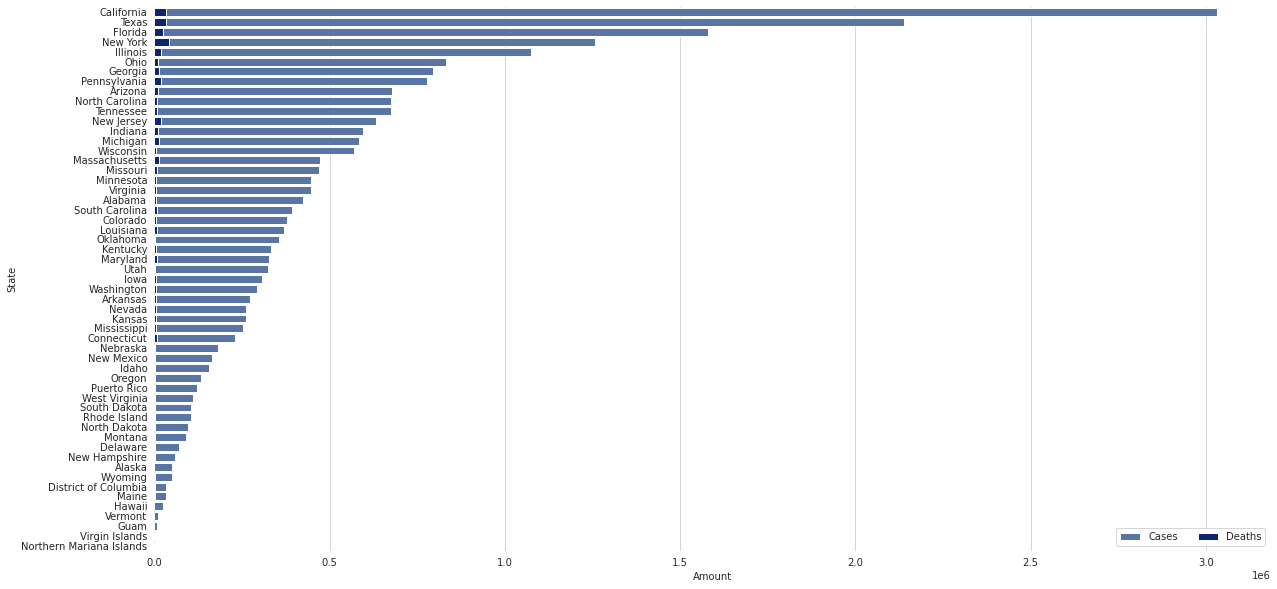

In [32]:
f, ax = plt.subplots(figsize=(20, 10))

# Drops the columns which won't be needed for the bar graph
state_curr_data = curr_data.drop(labels=['date', 'county', 'fips', 'month', 'month of year',
                                         'day', 'day of month', 'year'], axis=1)

# Sorts the values of state_curr_data by state and re-indexes them by state
state_curr_data = state_curr_data.sort_values('state').reset_index(drop=True)

# Computes the sum of cases and deaths per state, then sorts them by cases
state_curr_data = state_curr_data.groupby('state').sum().sort_values('cases', ascending=False)

# Plots the number of cases on the bar graph
sns.set_color_codes('deep')
sns.barplot(x='cases', y=state_curr_data.index, data=state_curr_data, label='Cases', color='b')

# Plots the number of deaths on the bar graph, overlaying the existing bars for cases
sns.set_color_codes('dark')
sns.barplot(x='deaths', y=state_curr_data.index, data=state_curr_data, label='Deaths', color='b')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="State", xlabel="Amount")
sns.despine(left=True, bottom=True)

Graph 3.7 shows that not much has changed since the end of 2020 and today (Jan. 19, 2021 as of the time of writing). The current top 10 for Covid cases is:
1. California
1. Texas
1. Florida
1. New York
1. Illinois
1. Ohio
1. Georgia
1. Pennsylvania
1. Arizona
1. North Carolina

# Analysis of Covid-19 Cases in New York

## Covid-19 Cases and Deaths by County in New York


In [33]:
# Creating a subset of the original data to get the data pertaining to NY
nyc_counties = curr_data[curr_data['state'] == 'New York'].reset_index(drop=True)

# Drops the columns which won't be needed for the bar graph
nyc_counties = nyc_counties.drop(labels=['date', 'fips', 'state', 'month', 'month of year', 'day',
                                         'day of month', 'year'], axis=1)

nyc_counties = nyc_counties.sort_values('cases', ascending=False).reset_index(drop=True)

nyc_counties

,county,cases,deaths
0,New York City,536287,26104.0
1,Suffolk,127287,2589.0
2,Nassau,113812,2551.0
3,Westchester,84419,1797.0
4,Erie,51718,1371.0
5,Monroe,44008,760.0
6,Rockland,31668,622.0
7,Orange,28589,571.0
8,Onondaga,27492,528.0
9,Oneida,16660,342.0


### Graph 4.1 - Bar Plot of Current Covid-19 Cases and Deaths in New York by County

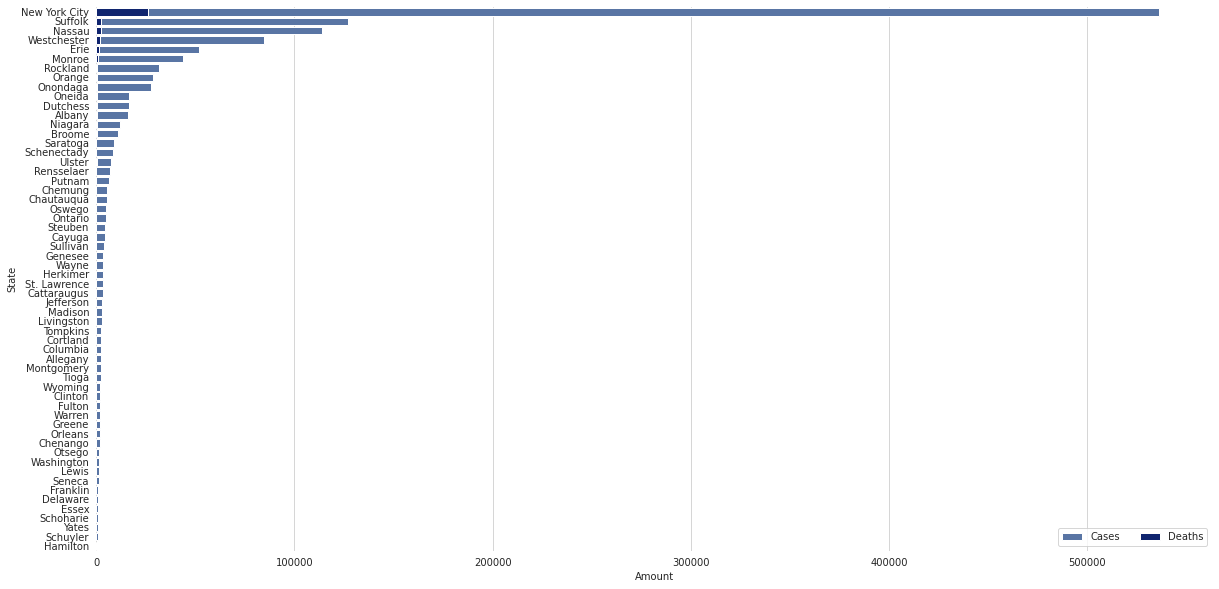

In [34]:
f, ax = plt.subplots(figsize=(20, 10))

# Plots the number of cases on the bar graph
sns.set_color_codes('deep')
sns.barplot(x='cases', y='county', data=nyc_counties, label='Cases', color='b')

# Plots the number of deaths on the bar graph, overlaying the existing bars for cases
sns.set_color_codes('dark')
sns.barplot(x='deaths', y='county', data=nyc_counties, label='Deaths', color='b')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="State", xlabel="Amount")
sns.despine(left=True, bottom=True)

Graph 4.1 tells us that the top 5 counties with Covid-19 cases and deaths are:
1. New York City
1. Suffolk
1. Nassau
1. Westchester
1. Erie

## Covid-19 Cases in NYC Since First Report

In [35]:
# Creating a subset of the original data to get the data pertaining to NYC
nyc_data = data[(data['state'] == 'New York') & (data['county'] == 'New York City')].reset_index(drop=True)

In [36]:
nyc_data

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
0,2020-03-01,New York City,New York,NaN,1,0.0,March,3,Sunday,1,2020
1,2020-03-02,New York City,New York,NaN,1,0.0,March,3,Monday,2,2020
2,2020-03-03,New York City,New York,NaN,2,0.0,March,3,Tuesday,3,2020
3,2020-03-04,New York City,New York,NaN,2,0.0,March,3,Wednesday,4,2020
4,2020-03-05,New York City,New York,NaN,4,0.0,March,3,Thursday,5,2020
...,...,...,...,...,...,...,...,...,...,...,...
319,2021-01-14,New York City,New York,NaN,510711,25834.0,January,1,Thursday,14,2021
320,2021-01-15,New York City,New York,NaN,517963,25909.0,January,1,Friday,15,2021
321,2021-01-16,New York City,New York,NaN,524231,25970.0,January,1,Saturday,16,2021
322,2021-01-17,New York City,New York,NaN,529834,26036.0,January,1,Sunday,17,2021


This subset of data tells us that the first report of COVID-19 cases and deaths in NYC came on March 1, 2020.

### Graph 4.2 - Plot of Covid-19 Cases Since First Report in NYC

[Text(0.5, 0, 'day'),
 Text(0.5, 1.0, 'Covid-19 Cases Since First Report - NYC')]

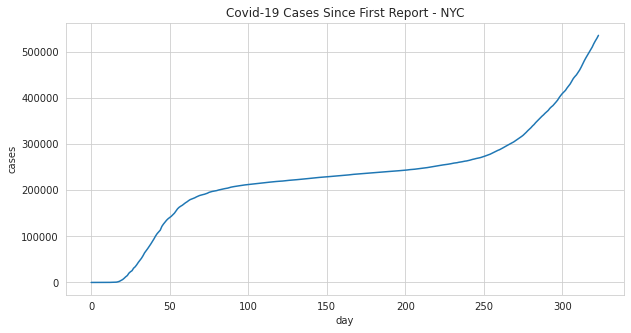

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(data=nyc_data['cases']).set(title='Covid-19 Cases Since First Report - NYC', xlabel='day')

Graph 4.2 shows that the largest increases in Covid-19 cases in NYC came between days 20 and 75 and days 250 and 325 after March 1. These ranges correspond to late March to early June and early November to present day. This conclusion makes sense since we know that the peaks in Covid cases in NYC came around the end of the spring 2020 semester and after Halloween 2020.

## Covid-19 Deaths in NYC Since First Report

### Graph 4.3 - Plot of Covid-19 Deaths Since First Report in NYC

[Text(0.5, 0, 'day'),
 Text(0.5, 1.0, 'Covid-19 Cases Since First Report - NYC')]

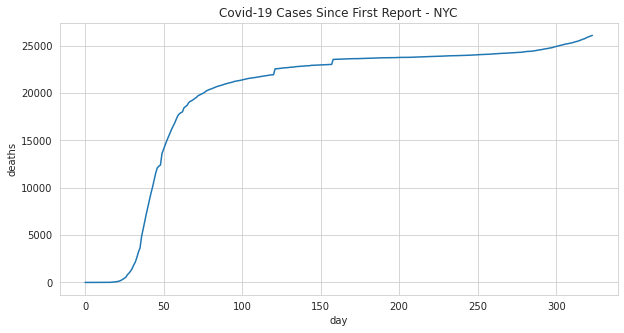

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(data=nyc_data['deaths']).set(title='Covid-19 Cases Since First Report - NYC', xlabel='day')

Graph 4.3 shows that the largest increase in Covid-related deaths occurred between days 25 and 100 after March 1. After this, the rate of increase in deaths became more steady with the exception of a couple abrupt jumps (around day 100 and day 155). As seen by the end of the graph, however, there appears to be another increase in deaths as the curve mimics the "S" shape seen between days 0 and 120.

## Covid-19 Cases in NYC Over Last 30 Days

In [39]:
# Creating a subset of the NYC data to get the last 30 days
last_30_nyc = nyc_data.tail(30).reset_index(drop=True)

last_30_nyc

,date,county,state,fips,cases,deaths,month,month of year,day,day of month,year
0,2020-12-20,New York City,New York,NaN,383808,24697.0,December,12,Sunday,20,2020
1,2020-12-21,New York City,New York,NaN,387595,24735.0,December,12,Monday,21,2020
2,2020-12-22,New York City,New York,NaN,391634,24768.0,December,12,Tuesday,22,2020
3,2020-12-23,New York City,New York,NaN,395810,24790.0,December,12,Wednesday,23,2020
4,2020-12-24,New York City,New York,NaN,401251,24842.0,December,12,Thursday,24,2020
5,2020-12-25,New York City,New York,NaN,405857,24889.0,December,12,Friday,25,2020
6,2020-12-26,New York City,New York,NaN,410048,24931.0,December,12,Saturday,26,2020
7,2020-12-27,New York City,New York,NaN,413472,24973.0,December,12,Sunday,27,2020
8,2020-12-28,New York City,New York,NaN,416922,25008.0,December,12,Monday,28,2020
9,2020-12-29,New York City,New York,NaN,422074,25055.0,December,12,Tuesday,29,2020


### Graph 4.4 - Plot of Covid-19 Cases Over Last 30 Days


[Text(0.5, 0, 'day'), Text(0.5, 1.0, 'Covid-19 Cases Over Last 30 Days - NYC')]

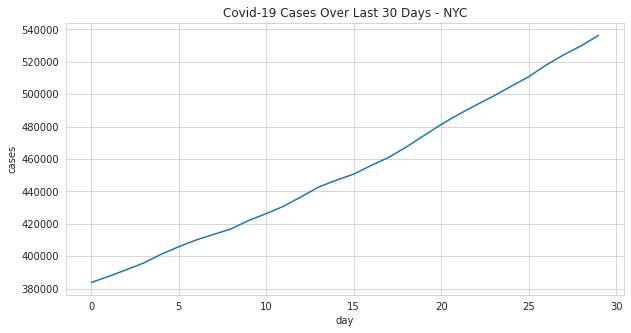

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(data=last_30_nyc['cases']).set(title='Covid-19 Cases Over Last 30 Days - NYC', xlabel='day')

Graph 4.4 appears to be linear since we're operating on a small data set; however, as shown by graph 4.2, this is not the case.

## Covid-19 Deaths in NYC Over Last 30 Days

### Graph 4.5 - Plot of Covid-19 Deaths Over Last 30 Days


[Text(0.5, 0, 'day'), Text(0.5, 1.0, 'Covid-19 Cases Over Last 30 Days - NYC')]

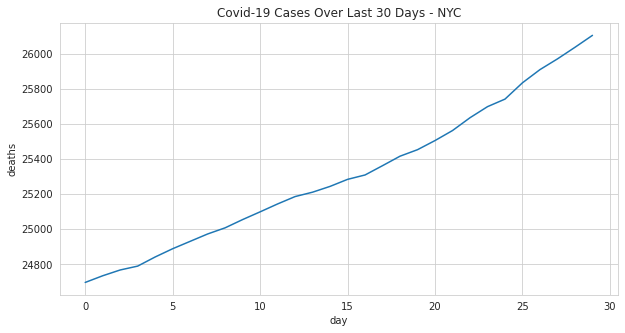

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(data=last_30_nyc['deaths']).set(title='Covid-19 Cases Over Last 30 Days - NYC', xlabel='day')

Graph 4.5 appears to be linear since we're operating on a small data set; however, as shown by graph 4.2, this may not be the case.

# Comparing Covid-19 Cases in NY to Other States and Territories

## Functions to Generalize Comparisons

In [42]:
def compare_ny_data(df, states, kind):
  plt.figure(figsize=(10,5))

  # Iterates over the unique states (or territories) listed in the original data
  for state in states:
    # Creates a subset of the original data where the state is the same as the
    # current state from the for loop
    state_data = df[df['state'] == state].reset_index()

    # Drops the labels which won't be needed for the graph
    state_data = state_data.drop(labels=['county', 'state', 'fips', 'month', 'month of year', 'day',
                                        'day of month', 'year'], axis=1)
    
    # Groups the state's data by date, sums the cases and deaths, then resets
    # the row indices
    state_data = state_data.groupby('date').sum().reset_index()

    # Plots the curve for Covid-19 deaths for the current state
    sns.lineplot(data=state_data[kind], label=state)

  plt.title('Covid-19 ' + kind.title() + ' vs. Days Since First Report')
  plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)
  plt.xlabel('Days Since First Report')

def get_states(kind):
  n = int(input('How many states would you like to compare NY data with? '))
  states = ['New York']

  for i in range(n):
    states.append(input('Enter a state other than New York: ').title())

  return states

## Cases in New York vs. Other States

### Graph 5.1 - Covid-19 Cases in New York vs. Other States

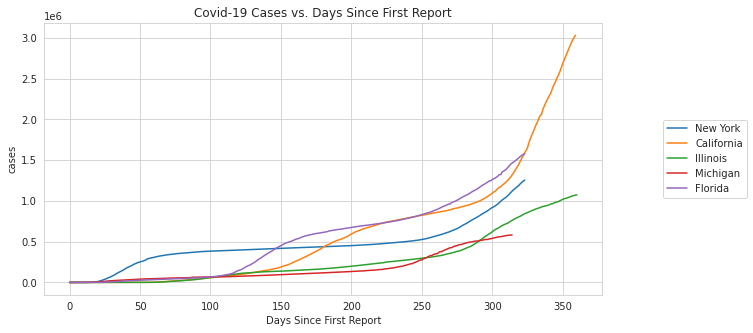

In [45]:
# Uncomment the following lines to get user interactivity

#states = get_states('cases')

states = ['New York', 'California', 'Illinois', 'Michigan', 'Florida']

compare_ny_data(data, states, 'cases')

As shown by Graph 5.1, New York ranks 4th in Covid-19 cases among California, Texas, Florida, New Jersey, and Michigan.

## Deaths in New York vs. Other States

### Graph 5.2 - Covid-19 Deaths in New York vs. Other States

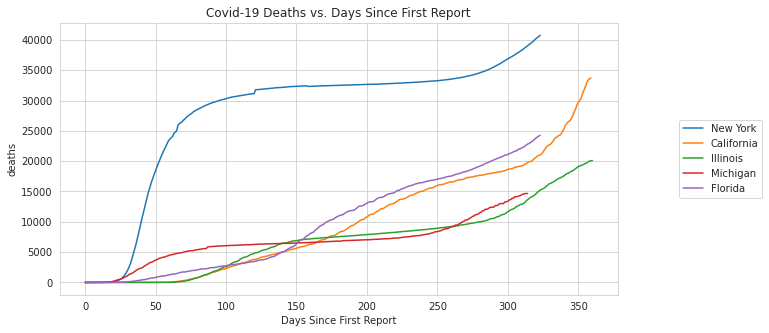

In [46]:
# Uncomment the following line to get user interactivity

#states = get_states('deaths')

states = ['New York', 'California', 'Illinois', 'Michigan', 'Florida']

compare_ny_data(data, states, 'deaths')

As shown by Graph 5.2, New York ranks 1st in Covid-19 cases among Illinois, Pennsylvania, Arizona, Connecticut, and Washington.

# Conclusion

From our analysis on Covid-19 data from New York, we can conclude the following:

1. New York City ranks first in Covid cases and deaths among all listed counties in New York.
1. New York currently ranks first in the country in total number of Covid-related deaths.
1. New York currently ranks fourth in the country in total number of Covid-related cases.
1. The number of Covid cases and deaths in New York are still increasing.
1. New York first started recording Covid cases and deaths on March 1, 2020.
1. The rate of increase for Covid cases in New York slowed down between mid-June and late October.